In [2]:
import time
import uuid
import os
import cv2
import tensorflow as tf
import albumentations as alb
import numpy as np
import json
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [2]:
IMAGES_PATH = os.path.join("C:\\Users\\tiwar\\OneDrive\\Desktop\\data","C:\\Users\\tiwar\\OneDrive\\Desktop\\data\\images")
number_images = 30

In [33]:
cap = cv2.VideoCapture(0)
for img in range(number_images):
    print(f'collecting image number {img}')
    ret,frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname,frame)
    cv2.imshow('frame',frame)
    time.sleep(.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

collecting image number 0
collecting image number 1
collecting image number 2
collecting image number 3
collecting image number 4
collecting image number 5
collecting image number 6
collecting image number 7
collecting image number 8
collecting image number 9
collecting image number 10
collecting image number 11
collecting image number 12
collecting image number 13
collecting image number 14
collecting image number 15
collecting image number 16
collecting image number 17
collecting image number 18
collecting image number 19
collecting image number 20
collecting image number 21
collecting image number 22
collecting image number 23
collecting image number 24
collecting image number 25
collecting image number 26
collecting image number 27
collecting image number 28
collecting image number 29


In [4]:
!pip install labelme tensorflow opencv-python matplotlib albumentations

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.list_physical_devices('GPU')

[]

In [23]:
images = tf.data.Dataset.list_files("C:\\Users\\tiwar\\OneDrive\\Desktop\\data\\images\\*.jpg", shuffle=False)

In [24]:
images.as_numpy_iterator().next()

b'C:\\Users\\tiwar\\OneDrive\\Desktop\\data\\images\\a608ffdb-c8da-11ed-95e8-346f240cb82c.jpg'

In [28]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [26]:
images = images.map(load_image)

In [27]:
images.as_numpy_iterator().next()

array([[[134, 147, 153],
        [133, 146, 152],
        [133, 146, 152],
        ...,
        [141, 151, 163],
        [140, 150, 162],
        [140, 150, 162]],

       [[134, 147, 153],
        [134, 147, 153],
        [134, 147, 153],
        ...,
        [142, 152, 164],
        [141, 151, 163],
        [141, 151, 163]],

       [[135, 148, 154],
        [135, 148, 154],
        [135, 148, 154],
        ...,
        [142, 152, 164],
        [142, 152, 164],
        [141, 151, 163]],

       ...,

       [[161, 127,  27],
        [159, 125,  25],
        [158, 125,  22],
        ...,
        [241, 251, 253],
        [241, 252, 254],
        [240, 254, 255]],

       [[161, 128,  25],
        [160, 127,  24],
        [160, 127,  24],
        ...,
        [238, 247, 252],
        [231, 245, 248],
        [231, 246, 249]],

       [[156, 123,  20],
        [157, 124,  21],
        [158, 125,  22],
        ...,
        [224, 233, 238],
        [230, 245, 248],
        [227, 245, 247]]

In [28]:
type(images)

tensorflow.python.data.ops.dataset_ops.MapDataset

In [29]:
image_generator = images.batch(4).as_numpy_iterator()

In [30]:
plot_images = image_generator.next()

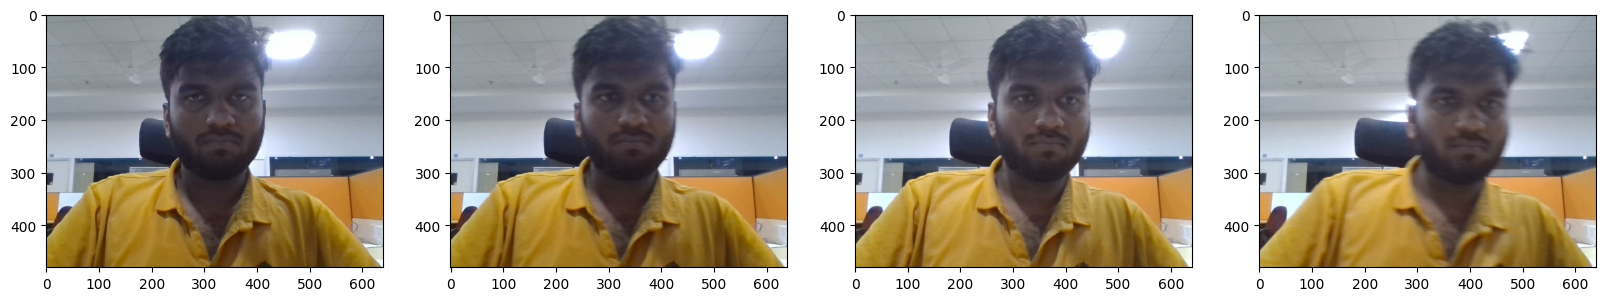

In [31]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

In [3]:
for folder in ["C:\\Users\\tiwar\\OneDrive\\Desktop\data\\train","C:\\Users\\tiwar\\OneDrive\\Desktop\\data\\test","C:\\Users\\tiwar\\OneDrive\\Desktop\\data\\val"]:
    for file in os.listdir(os.path.join("C:\\Users\\tiwar\\OneDrive\\Desktop\\data",folder,"images")):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join("C:\\Users\\tiwar\\OneDrive\\Desktop\\data",'labels',filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join("C:\\Users\\tiwar\\OneDrive\\Desktop\\data",folder,'labels',filename)
            os.replace(existing_filepath,new_filepath)

In [4]:
img = cv2.imread(os.path.join('data','train','images',"C:\\Users\\tiwar\\OneDrive\\Desktop\\data\\train\\images\\4a1e65e8-c8db-11ed-822a-346f240cb82c.jpg"))

In [5]:
img.shape

(480, 640, 3)

In [6]:
augmentor = alb.Compose([alb.RandomCrop(width=450,height=450),
                        alb.HorizontalFlip(p=0.5),
                        alb.RandomBrightnessContrast(p=0.2),
                        alb.RandomGamma(p=0.2),
                        alb.RGBShift(p=0.2),
                        alb.VerticalFlip(p=0.5)],
                       bbox_params=alb.BboxParams(format='albumentations',
                                                 label_fields=['class_labels']))

In [7]:
img = cv2.imread(os.path.join('data','train','images',"C:\\Users\\tiwar\\OneDrive\\Desktop\\data\\train\\images\\4a1e65e8-c8db-11ed-822a-346f240cb82c.jpg"))

In [8]:
img

array([[[157, 151, 146],
        [157, 151, 146],
        [157, 151, 146],
        ...,
        [170, 154, 147],
        [171, 156, 147],
        [171, 156, 147]],

       [[158, 152, 147],
        [158, 152, 147],
        [157, 151, 146],
        ...,
        [170, 154, 147],
        [170, 155, 146],
        [170, 155, 146]],

       [[158, 152, 147],
        [159, 153, 148],
        [158, 152, 147],
        ...,
        [171, 155, 148],
        [171, 156, 147],
        [170, 155, 146]],

       ...,

       [[ 42,  37,  39],
        [ 44,  39,  41],
        [ 46,  39,  42],
        ...,
        [253, 254, 244],
        [254, 255, 245],
        [254, 255, 245]],

       [[ 47,  41,  42],
        [ 49,  43,  44],
        [ 51,  44,  47],
        ...,
        [255, 255, 243],
        [255, 255, 243],
        [255, 255, 244]],

       [[ 51,  45,  46],
        [ 54,  48,  49],
        [ 56,  49,  52],
        ...,
        [255, 254, 243],
        [254, 254, 242],
        [255, 255, 243]]

In [9]:
with open(os.path.join('data', 'train', 'labels', "C:\\Users\\tiwar\\OneDrive\\Desktop\\data\\train\\labels\\4a1e65e8-c8db-11ed-822a-346f240cb82c.json"), 'r') as f:
    label = json.load(f)

In [10]:
label

{'version': '5.1.1',
 'flags': {},
 'shapes': [{'label': 'face',
   'points': [[236.15384615384613, 24.615384615384613],
    [430.0, 308.20512820512823]],
   'group_id': None,
   'shape_type': 'rectangle',
   'flags': {}}],
 'imagePath': '..\\images\\4a1e65e8-c8db-11ed-822a-346f240cb82c.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVld

In [11]:
label['shapes'][0]['points']

[[236.15384615384613, 24.615384615384613], [430.0, 308.20512820512823]]

In [12]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [13]:
coords

[236.15384615384613, 24.615384615384613, 430.0, 308.20512820512823]

In [14]:
coords = list(np.divide(coords,[640,480,640,480]))

In [15]:
coords

[0.3689903846153846, 0.05128205128205128, 0.671875, 0.6420940170940171]

In [16]:
augmented = augmentor(image=img, bboxes=[coords],class_labels=['face'])

In [17]:
augmented['image']

array([[[156, 152, 147],
        [157, 153, 148],
        [156, 152, 147],
        ...,
        [219, 203, 197],
        [222, 203, 198],
        [222, 203, 198]],

       [[156, 152, 147],
        [157, 153, 148],
        [160, 156, 151],
        ...,
        [222, 203, 198],
        [223, 204, 199],
        [223, 204, 199]],

       [[156, 152, 147],
        [157, 153, 148],
        [160, 156, 151],
        ...,
        [225, 206, 201],
        [226, 207, 202],
        [226, 207, 202]],

       ...,

       [[ 35,  38,  42],
        [ 33,  38,  41],
        [ 37,  42,  45],
        ...,
        [ 60, 140, 177],
        [ 63, 141, 178],
        [ 63, 141, 178]],

       [[ 34,  37,  41],
        [ 33,  36,  40],
        [ 30,  35,  38],
        ...,
        [ 61, 141, 178],
        [ 63, 141, 178],
        [ 63, 141, 178]],

       [[ 34,  35,  39],
        [ 32,  35,  39],
        [ 33,  38,  41],
        ...,
        [ 61, 141, 178],
        [ 62, 142, 179],
        [ 62, 142, 179]]

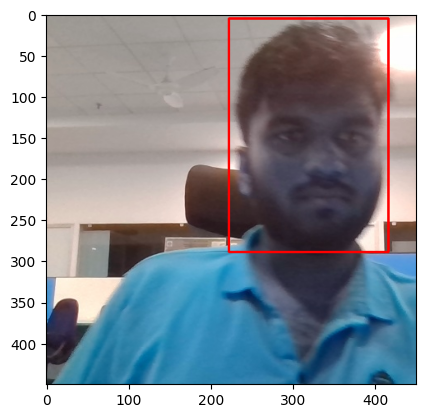

In [18]:
cv2.rectangle(augmented['image'],
             tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
             tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)),
                   (255,0,0), 2)
plt.imshow(augmented['image'])

In [19]:
augmented['bboxes'][0][2:]

(0.9244444444444444, 0.6426780626780627)

In [20]:
augmented['bboxes'][0][:2]

(0.4936752136752136, 0.012478632478632474)

In [21]:
augmented['bboxes']

[(0.4936752136752136,
  0.012478632478632474,
  0.9244444444444444,
  0.6426780626780627)]

In [26]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

KeyboardInterrupt: 

In [29]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [30]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [31]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [32]:
train_images.as_numpy_iterator().next()

array([[[0.6166667 , 0.4730392 , 0.1264093 ],
        [0.6021446 , 0.45851716, 0.11341912],
        [0.6112745 , 0.46764705, 0.12254902],
        ...,
        [0.6454657 , 0.49270833, 0.19172794],
        [0.59313726, 0.4122549 , 0.08609068],
        [0.5613971 , 0.37640932, 0.00974265]],

       [[0.6184436 , 0.47726715, 0.14001225],
        [0.6074142 , 0.46623775, 0.12898284],
        [0.60398287, 0.46280637, 0.12555148],
        ...,
        [0.61360294, 0.46666667, 0.11856618],
        [0.56911767, 0.3970588 , 0.02408088],
        [0.549326  , 0.36893383, 0.        ]],

       [[0.6139093 , 0.47273284, 0.13547795],
        [0.6161152 , 0.47493872, 0.13768382],
        [0.6117647 , 0.47058824, 0.13333334],
        ...,
        [0.5938113 , 0.4269608 , 0.05208333],
        [0.5626838 , 0.38327205, 0.00147059],
        [0.55968136, 0.37634805, 0.        ]],

       ...,

       [[0.6525735 , 0.6917892 , 0.7310049 ],
        [0.65839463, 0.6976103 , 0.7378064 ],
        [0.65882355, 0

In [33]:
def load_labels(label_path):
    with open(label_path.numpy(),'r',encoding='utf-8') as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [34]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [35]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [36]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [37]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.3628, 0.325 , 0.782 , 0.953 ], dtype=float16))

In [38]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(4080, 4080, 600, 600, 480, 480)

In [39]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(3000)
train = train.batch(8)
train = train.prefetch(4)

In [40]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1000)
test = test.batch(8)
test = test.prefetch(4)

In [41]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1300)
val = val.batch(8)
val = val.prefetch(4)

In [42]:
train.as_numpy_iterator().next()[1]

(array([[0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.     , 0.     , 0.     , 0.     ],
        [0.322  , 0.     , 0.8506 , 0.7417 ],
        [0.     , 0.0942 , 0.338  , 0.7837 ],
        [0.     , 0.10046, 0.3447 , 0.814  ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.     , 0.04108, 0.06635, 0.726  ],
        [0.3826 , 0.4163 , 0.7153 , 0.912  ],
        [0.762  , 0.1094 , 1.     , 0.8594 ]], dtype=float16))

In [43]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(4080, 4080, 600, 600, 480, 480)

In [44]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [45]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [46]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.6626  , 0.3013  , 1.      , 0.918   ],
        [0.      , 0.319   , 0.327   , 1.      ],
        [0.549   , 0.005127, 1.      , 0.681   ],
        [0.2842  , 0.07495 , 0.633   , 0.6094  ],
        [0.2969  , 0.363   , 0.722   , 1.      ],
        [0.2874  , 0.04913 , 0.5645  , 0.64    ],
        [0.      , 0.105   , 0.3154  , 0.855   ],
        [0.      , 0.      , 0.1395  , 0.677   ]], dtype=float16))

In [47]:
data_samples = train.as_numpy_iterator()

In [56]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


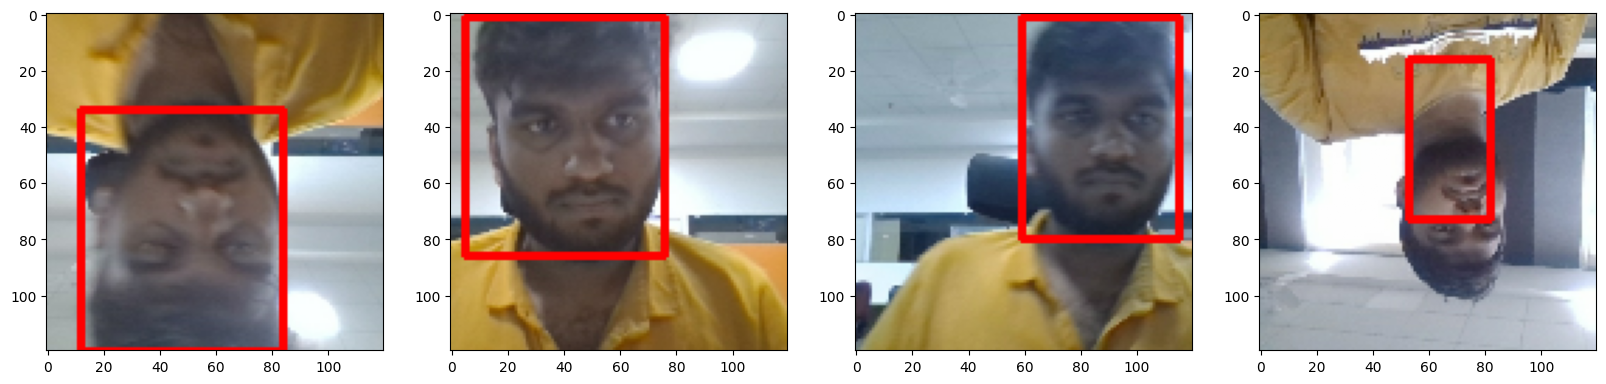

In [57]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [50]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [51]:
vgg = VGG16(include_top=False)
vgg.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                              

In [52]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [53]:
facetracker = build_model()

In [54]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [55]:
X, y = train.as_numpy_iterator().next()

In [58]:
X.shape

(8, 120, 120, 3)

In [59]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 1s 1s/step


In [60]:
classes, coords

(array([[0.48597252],
        [0.560827  ],
        [0.50319165],
        [0.5652233 ],
        [0.41633868],
        [0.51577795],
        [0.53760743],
        [0.5346331 ]], dtype=float32),
 array([[0.38682425, 0.5852275 , 0.38448104, 0.5862097 ],
        [0.42936692, 0.61647314, 0.3488518 , 0.64521426],
        [0.38106248, 0.5550625 , 0.40354416, 0.53755677],
        [0.40689394, 0.56561714, 0.43528464, 0.5345966 ],
        [0.37320563, 0.41586834, 0.34686235, 0.5843653 ],
        [0.42979568, 0.60084426, 0.3502903 , 0.60577214],
        [0.42441845, 0.5847498 , 0.3291675 , 0.4608048 ],
        [0.37811586, 0.57986397, 0.38654372, 0.70254475]], dtype=float32))

In [61]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [64]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [65]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [66]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [67]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=7.447788>

In [68]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.66779995>

In [69]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=7.447788>

In [70]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [71]:
model = FaceTracker(facetracker)

In [72]:
model.compile(opt, classloss, regressloss)

In [73]:
logdir='logs'

In [74]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [75]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
510/510 [==============================] - 964s 2s/step - total_loss: 0.3786 - class_loss: 0.0763 - regress_loss: 0.3404 - val_total_loss: 0.1722 - val_class_loss: 0.0842 - val_regress_loss: 0.1301
Epoch 2/10
510/510 [==============================] - 843s 2s/step - total_loss: 0.1644 - class_loss: 0.0404 - regress_loss: 0.1441 - val_total_loss: 0.1219 - val_class_loss: 0.0026 - val_regress_loss: 0.1206
Epoch 3/10
510/510 [==============================] - 841s 2s/step - total_loss: 0.1374 - class_loss: 0.0348 - regress_loss: 0.1200 - val_total_loss: 0.0984 - val_class_loss: 0.0216 - val_regress_loss: 0.0876
Epoch 4/10
510/510 [==============================] - 812s 2s/step - total_loss: 0.1401 - class_loss: 0.0390 - regress_loss: 0.1206 - val_total_loss: 0.5430 - val_class_loss: 0.0784 - val_regress_loss: 0.5038
Epoch 5/10
510/510 [==============================] - 836s 2s/step - total_loss: 0.0867 - class_loss: 0.0247 - regress_loss: 0.0743 - val_total_loss: 0.0504 - val_c

In [76]:
hist.history

{'total_loss': [0.3186117708683014,
  0.024191774427890778,
  0.07355563342571259,
  0.02702607959508896,
  0.03177579492330551,
  0.03683866932988167,
  0.059809911996126175,
  0.06933381408452988,
  0.009980842471122742,
  0.02687957137823105],
 'class_loss': [0.06944204121828079,
  0.00011445070413174108,
  0.012479380704462528,
  6.958108860999346e-05,
  7.508877024520189e-05,
  0.012316236272454262,
  0.00025207558064721525,
  5.3976415074430406e-05,
  0.0026549554895609617,
  1.7450260202167556e-05],
 'regress_loss': [0.2838907539844513,
  0.024134548380970955,
  0.06731594353914261,
  0.026991289108991623,
  0.03173825144767761,
  0.030680550262331963,
  0.05968387424945831,
  0.06930682808160782,
  0.008653365075588226,
  0.02687084674835205],
 'val_total_loss': [0.17217376828193665,
  0.12185874581336975,
  0.09837014228105545,
  0.5429856181144714,
  0.05043124407529831,
  0.08330433070659637,
  0.12843386828899384,
  0.050334420055150986,
  0.024386249482631683,
  0.02687263

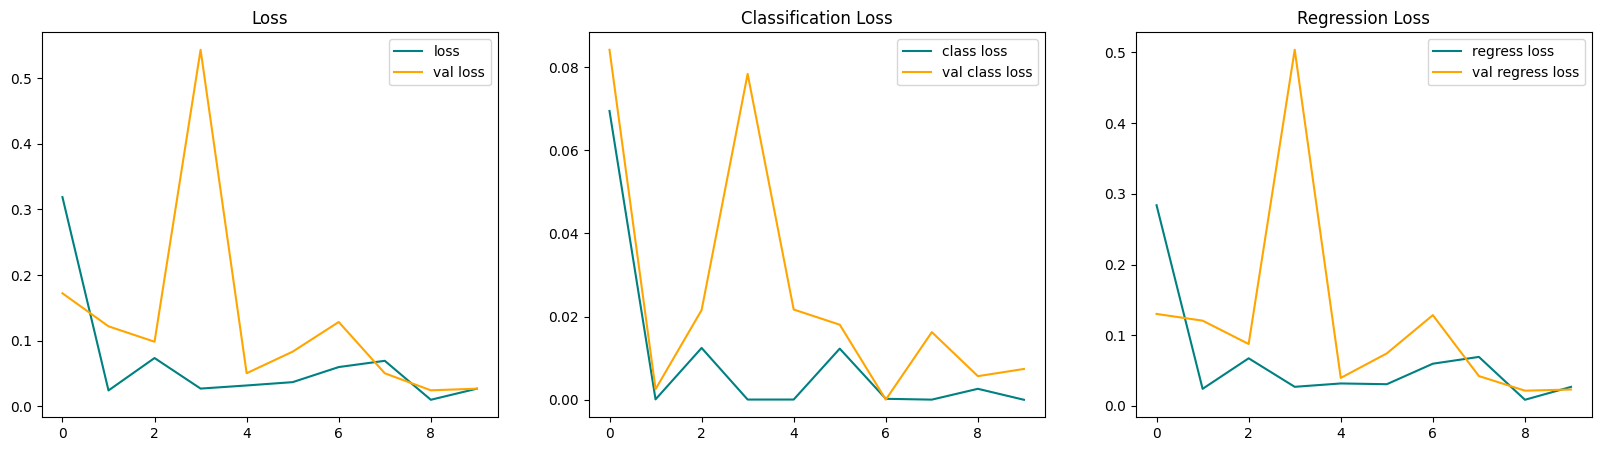

In [77]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [78]:
test_data = test.as_numpy_iterator()

In [79]:
test_sample = test_data.next()

In [80]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 306ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


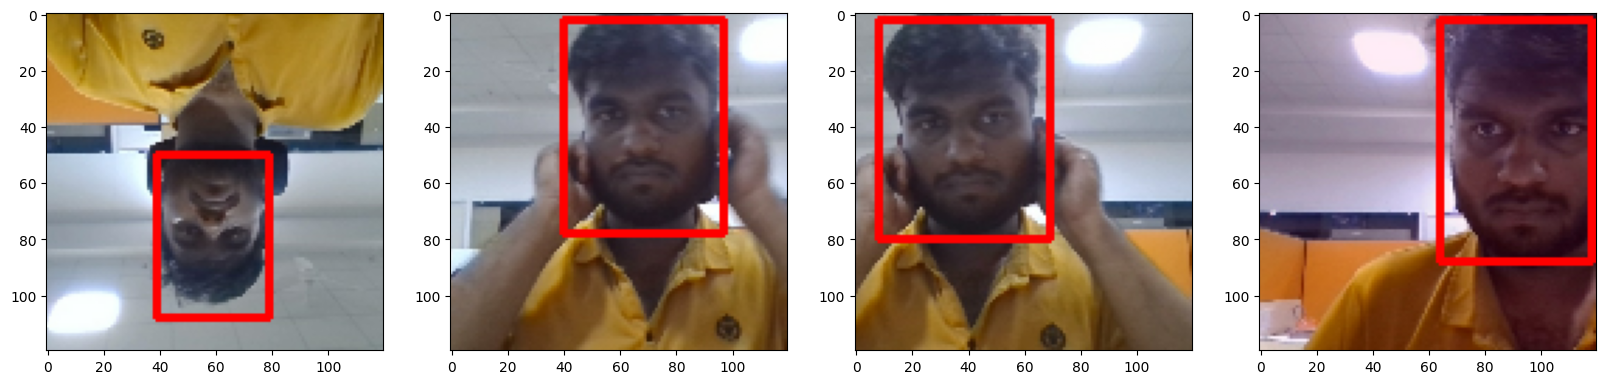

In [81]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [4]:
from tensorflow.keras.models import load_model

In [83]:
facetracker.save('facetracker.h5')

In [5]:
facetracker = load_model('facetracker.h5')

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 131ms/step
